In [ ]:
!pip install Keras==2.2.4
!pip install tensorflow-gpu==1.15


     |████████████████████████████████| 317kB 5.3MB/s 
     |████████████████████████████████| 51kB 4.9MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3
     |████████████████████████████████| 411.5MB 44kB/s 
     |████████████████████████████████| 3.8MB 46.2MB/s 
     |████████████████████████████████| 512kB 42.3MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=c4e3367d20aa52daf4030fbb721a1ddd77211e18437a638bea6798e5bab35cf4
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.3.0 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement tensorboard<3,>=2.3.0, but you'll have tensorboard 1.15.0 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement tensorflow-estimator<2.4.0,>=2.3.0, but you'll have tensorflow-est

In [ ]:
import os
import re
import pickle
from tqdm import tqdm
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Dropout, Embedding, Bidirectional, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split
# from keras.layers import Embedding
from  keras . utils  import  to_categorical
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D, Permute
from tensorflow.keras.layers import Conv1D,Conv2D, MaxPooling1D, Embedding, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import Constant
from tensorflow.keras.layers import Embedding

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

Using TensorFlow backend.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd 
df_train=pd.read_csv('gdrive/My Drive/Thesis Data/Our dataset/ulm_train.csv')
df_test=pd.read_csv('gdrive/My Drive/Thesis Data/Our dataset/ulm_test.csv')


In [ ]:
!git clone -l -s https://github.com/banglakit/bengali-stemmer.git

Cloning into 'bengali-stemmer'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 94 (delta 5), reused 16 (delta 4), pack-reused 69
Unpacking objects: 100% (94/94), done.


In [ ]:
!pip install git+https://github.com/banglakit/bengali-stemmer.git    

  Cloning https://github.com/banglakit/bengali-stemmer.git to /tmp/pip-req-build-o1x48d_p
  Running command git clone -q https://github.com/banglakit/bengali-stemmer.git /tmp/pip-req-build-o1x48d_p
  Created wheel for bengali-stemmer: filename=bengali_stemmer-0.0.1-py2.py3-none-any.whl size=6393 sha256=63af7cc30db99c98a2e4c10850a276212e7a88186b91f79937ecafbdde2a3e12
  Stored in directory: /tmp/pip-ephem-wheel-cache-31s_70l5/wheels/a1/ad/a1/4ba354059b17c00600a14e13a504e7bdb49f20f2f4e2f3639c
Successfully built bengali-stemmer


In [ ]:
!pip install git+https://github.com/banglakit/bengali-stemmer.git    

  Cloning https://github.com/banglakit/bengali-stemmer.git to /tmp/pip-req-build-y3a1om_u
  Running command git clone -q https://github.com/banglakit/bengali-stemmer.git /tmp/pip-req-build-y3a1om_u
  Created wheel for bengali-stemmer: filename=bengali_stemmer-0.0.1-py2.py3-none-any.whl size=6393 sha256=92b72c18a45bc1f86e0aa316d5fa438bdc89ffba81889f53f41f07a8f5d5ca1f
  Stored in directory: /tmp/pip-ephem-wheel-cache-1khgi4sy/wheels/a1/ad/a1/4ba354059b17c00600a14e13a504e7bdb49f20f2f4e2f3639c
Successfully built bengali-stemmer


In [ ]:
from bengali_stemmer.rafikamal2014 import RafiStemmer
stemmer = RafiStemmer()
stemmer.stem_word('বাংলায়')

'বাংলা'

In [ ]:
total_data = df_train
total_data=total_data.append(df_test, ignore_index = True)

In [ ]:
macronum=sorted(set(total_data['label']))
macro_to_id = dict((note, number) for number, note in enumerate(macronum))

def fun(i):
    return macro_to_id[i]

total_data['label']=total_data['label'].apply(fun)


In [ ]:
texts = list(total_data['text'])
labels = list(total_data['label'])


In [ ]:
def clean_punct(sentence):
    cleaned = re.sub(r'[?|!|\'|"|#|।|’|‘]', r'', sentence)
    cleaned1 = re.sub(r'[.|,|(|)|\|/]', r'', cleaned)
    cleaned = re.sub(r'[০|১|২|৩|৪|৫|৬|৭|৮|৯]', r'', cleaned1)
    cleaned1 = re.sub(r'[-|=]', r' ', cleaned)
    return cleaned1

In [ ]:
stopwords = pd.read_csv('gdrive/My Drive/Colab Notebooks/Stopwords.csv')

In [ ]:
set_stop = set(stopwords['words'])

In [ ]:

def pre_process(data):
    i=0
    str1=' '
    final_string = []
    final_words = []
    all_negative_words = []
    s=''

    for sentence in data:
        filtered_sentence = []

        for w in sentence.split():
            for cleaned_word in clean_punct(w).split():
                if len(cleaned_word)>2:
                    if((cleaned_word) not in set_stop):
                        s = stemmer.stem_word(cleaned_word)
                        if len(s)>2:
                            final_words.append(s)
                            filtered_sentence.append(s)
                    else:
                        continue
                else:
                    continue

        str1 = " ".join(filtered_sentence)
        final_string.append(str1)
    return final_string

In [ ]:
texts = pre_process(texts)

In [ ]:
texts[0]

'সাম্প্রদায়িক সংঘাত মানবিক প্রতিরোধ সাম্প্রদায়িক সংঘাত মানবিক প্রতিরোধফকির ইলিয়াস দেশ থাকি বহুজাতিক বহুভাষিক মানুষ বাস ধর্মাবলম্বী মতাবলম্বী মানুষ কারো কারো মিল চাইল সামান্য বিষ প্রতিদিন দাঙ্গা তেমন হ্যাঁ প্রি পাঠক মার্কিন যুক্তরাষ্ট্র কথা বলছিএ দেশ মানুষ মানুষ বুক পাঁজর চিবি দেশ কঠোর আইন থাক পার পারব পারব কঠিন শাস্তির মুখোমুখি জীবনবাজি রায়ট কেপাক ভারত উপমহাদেশ জন্ম বিভক্ত রায়ট মধ্য কারোর অজানা জন্মইতিহাস জন্ম পাকিস্তান ভারত পরবর্তীকাল বাংলাদেশ ভূখণ্ড দ্বিজাতি তত্ত্ব শত্রু সম্পত্তি আইন মানুষ মানুষ ধর্ম বিভাজন সেভাব পরিকল্পিতভাব সাল ভারত ভাগ অসংখ্য হিন্দু ঘরবাড়ি ছেড় গিয় জিন্নাহর দ্বিজাতি তত্ত্ব ভিত্তি ওঠা দেশ অস্তিত্ব রক্ষা প্রশ্ন প্রথম সাল পূর্বতন পূর্ব পাকিস্তান সাম্প্রদায়িক দাঙ্গ হিন্দু নিরাপত্ত পালি সাল হিন্দু আওয়ামী লীগ ভোট বিশ্বাস দখলদ পাক সেনা সহযোগী প্রবল প্রতিশোধস্পৃহা খুঁজ খুঁজ হিন্দু নিধন চালি হিন্দু বুদ্ধিজীবী সমাজসেবী শ্রদ্ধে ব্যক্তিত্ব ঢাকা বিশ্ববিদ্যালয় জগন্নাথ সহস্রাধিক হিন্দু ছাত্র হত্যা সাল নভেম্বর তারিখ ইউএস সিনেট কমি প্রামাণ্য প্রতিবেদন সিনেটর এডওয়ার্ড কেনেডি লিখ “সব

In [ ]:
def load_data(num_words, sequence_length, test_size=0.25, oov_token=None):
    tokenizer = Tokenizer(num_words=num_words, oov_token=oov_token)
    num_classes= 6
    y = to_categorical(np.asarray(labels), num_classes)
    tokenizer.fit_on_texts(texts)
    X = tokenizer.texts_to_sequences(texts)
    X = np.array(X)
    # pad sequences with 0's
    X = pad_sequences(X, maxlen=sequence_length)
    # split data to training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)
    data = {}
    data["X_train"] = X_train
    data["X_test"]= X_test
    data["y_train"] = y_train
    data["y_test"] = y_test
    data["tokenizer"] = tokenizer
    return data

In [ ]:
# train_data=pd.read_csv('gdrive/My Drive/Colab Notebooks/ulm_train.csv')
import numpy as np

def get_embedding_vectors(word_index, embedding_size=100):
    
    embedding_matrix = np.zeros((len(word_index) + 1, embedding_size))
    with open(f"gdrive/My Drive/Colab Notebooks/bn_glove.{embedding_size}d.txt", encoding="utf8") as f:
        for line in tqdm(f, "Reading GloVe"):
            values = line.split()
            # get the word as the first word in the line
            word = values[0]
            if word in word_index:
                idx = word_index[word]
                # get the vectors as the remaining values in the line
                embedding_matrix[idx] = np.array(values[1:], dtype="float32")
    return embedding_matrix

In [ ]:
d = set()
for s in texts:
    for ss in list(s.split()):
        d.add(ss)

In [ ]:
len(d)

112947

In [ ]:
max([len(s.split()) for s in texts]) # find the max length

11276

In [ ]:
#MAX_SEQUENCE_LENGTH = 11276    #max([len(s.split()) for s in texts]) 
# max_len = 1000
max_len = 4900
MAX_NUM_WORDS = 109803 + 1
vocab_size = MAX_NUM_WORDS
EMBEDDING_DIM = 300
VALIDATION_SPLIT = 0.2

data = load_data(MAX_NUM_WORDS,max_len,VALIDATION_SPLIT)

In [ ]:
len(data['tokenizer'].word_index)

109803

In [ ]:
embedding_matrix = get_embedding_vectors( data['tokenizer'].word_index ,EMBEDDING_DIM)

Reading GloVe: 134256it [00:07, 17650.01it/s]


In [ ]:
max_words = 109803 + 1
# max_len = 11276
# tok = Tokenizer(num_words=max_words)
# tok.fit_on_texts(X_train)
# sequences = tok.texts_to_sequences(X_train)
# sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [ ]:
from keras import backend as K
from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Conv1D, GRU 
from keras.layers import GRU, LSTM, BatchNormalization
from keras.layers import Bidirectional, GlobalMaxPool1D, MaxPooling1D, Add, Flatten
from keras.layers import GlobalAveragePooling1D, GlobalMaxPooling1D, concatenate, SpatialDropout1D
from keras.models import Model, load_model
from keras import initializers, regularizers, constraints, optimizers, layers, callbacks
from keras import backend as K
from keras.engine import InputSpec, Layer
from keras.optimizers import Adam

from keras.callbacks import ModelCheckpoint, TensorBoard, Callback, EarlyStopping

In [ ]:
class Attention(Layer):
    """
    Keras Layer that implements an Attention mechanism for temporal data.
    Supports Masking.
    Follows the work of Raffel et al. [https://arxiv.org/abs/1512.08756]
    # Input shape
        3D tensor with shape: `(samples, steps, features)`.
    # Output shape
        2D tensor with shape: `(samples, features)`.
    :param kwargs:
    Just put it on top of an RNN Layer (GRU/LSTM/SimpleRNN) with return_sequences=True.
    The dimensions are inferred based on the output shape of the RNN.
    Example:
        model.add(LSTM(64, return_sequences=True))
        model.add(Attention())
    """   
   
   
    def __init__(self, step_dim,
                 W_regularizer=None, b_regularizer=None,
                 W_constraint=None, b_constraint=None,
                 bias=True, **kwargs):
        self.supports_masking = True
        self.init = initializers.get('glorot_uniform')

        self.W_regularizer = regularizers.get(W_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        self.step_dim = step_dim
        self.features_dim = 0
        super(Attention, self).__init__(**kwargs)          
            
            
        self.features_dim = 0
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 3

        self.W = self.add_weight((input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        self.features_dim = input_shape[-1]

        if self.bias:
            self.b = self.add_weight((input_shape[1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)
        else:
            self.b = None
        self.built = True
    
    def compute_mask(self, input, input_mask=None):
        return None

    def call(self, x, mask=None):
        features_dim = self.features_dim
        step_dim = self.step_dim
        eij = K.reshape(K.dot(K.reshape(x, (-1, features_dim)),
                        K.reshape(self.W, (features_dim, 1))), (-1, step_dim))
        if self.bias:
            eij += self.b
        eij = K.tanh(eij)
        a = K.exp(eij)
        if mask is not None:
            a *= K.cast(mask, K.floatx())
        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())
        a = K.expand_dims(a)
        weighted_input = x * a
        return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        return input_shape[0],  self.features_dim

max_len =  and bs=64

In [ ]:
max_features = 109803 + 1
def build_model(max_len, max_features, EMBEDDING_DIM, embedding_matrix):
    input_words = Input((max_len, ))
    x_words = Embedding(max_features,
                        EMBEDDING_DIM,
                        weights=[embedding_matrix],
                        mask_zero=True,
                        trainable=False)(input_words)
    x_words = SpatialDropout1D(0.2)(x_words)
    x_words = Bidirectional(LSTM(128, return_sequences=True))(x_words)
    x_words = Bidirectional(LSTM(128, return_sequences=True))(x_words)
    
    x = Attention(max_len)(x_words)
    #x = GlobalMaxPooling1D()(x)
    #x = GlobalAveragePooling1D()(x)
    x = Dropout(0.2)(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.2)(x)
    pred = Dense(6, activation='softmax')(x)

    model = Model(inputs=input_words, outputs=pred)
    return model

model = build_model(max_len, max_features, EMBEDDING_DIM, embedding_matrix)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
'''
MAX_SEQUENCE_LENGTH = 11276    #max([len(s.split()) for s in texts]) 
MAX_NUM_WORDS = 109803 + 1
vocab_size = MAX_NUM_WORDS
EMBEDDING_DIM = 300
VALIDATION_SPLIT = 0.2

data = load_data(MAX_NUM_WORDS , MAX_SEQUENCE_LENGTH,VALIDATION_SPLIT)
'''











Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 4900)              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 4900, 300)         32941200  
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 4900, 300)         0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 4900, 256)         439296    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 4900, 256)         394240    
_____________________________________________________

'\nMAX_SEQUENCE_LENGTH = 11276    #max([len(s.split()) for s in texts]) \nMAX_NUM_WORDS = 109803 + 1\nvocab_size = MAX_NUM_WORDS\nEMBEDDING_DIM = 300\nVALIDATION_SPLIT = 0.2\n\ndata = load_data(MAX_NUM_WORDS , MAX_SEQUENCE_LENGTH,VALIDATION_SPLIT)\n'

In [ ]:
import tensorflow as tf
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)


maxlen = 5000



Train on 1680 samples, validate on 420 samples
Epoch 1/20
 - 1106s - loss: 1.5516 - acc: 0.3369 - val_loss: 1.2939 - val_acc: 0.4571
Epoch 2/20
 - 1135s - loss: 1.2785 - acc: 0.4685 - val_loss: 1.0879 - val_acc: 0.5667
Epoch 3/20
 - 1152s - loss: 1.1159 - acc: 0.5452 - val_loss: 0.9132 - val_acc: 0.6690
Epoch 4/20
 - 1096s - loss: 1.0198 - acc: 0.6155 - val_loss: 0.8474 - val_acc: 0.6905
Epoch 5/20
 - 1089s - loss: 0.9067 - acc: 0.6655 - val_loss: 0.8139 - val_acc: 0.6929
Epoch 6/20
 - 1086s - loss: 0.8482 - acc: 0.6798 - val_loss: 0.7058 - val_acc: 0.7714
Epoch 7/20
 - 1080s - loss: 0.8097 - acc: 0.7095 - val_loss: 0.7499 - val_acc: 0.7429
Epoch 8/20
 - 1080s - loss: 0.7373 - acc: 0.7399 - val_loss: 0.6192 - val_acc: 0.7881
Epoch 9/20
 - 1077s - loss: 0.6708 - acc: 0.7542 - val_loss: 0.6638 - val_acc: 0.7548
Epoch 10/20
 - 1068s - loss: 0.6403 - acc: 0.7667 - val_loss: 0.6334 - val_acc: 0.7595
Epoch 11/20
 - 1067s - loss: 0.5898 - acc: 0.7917 - val_loss: 0.6189 - val_acc: 0.7952
Epo

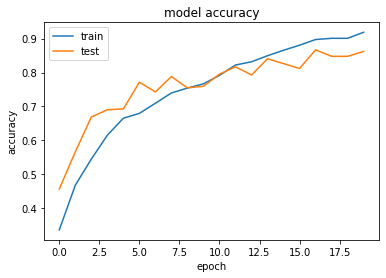

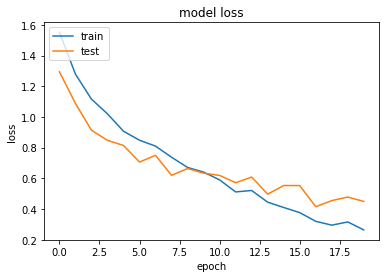

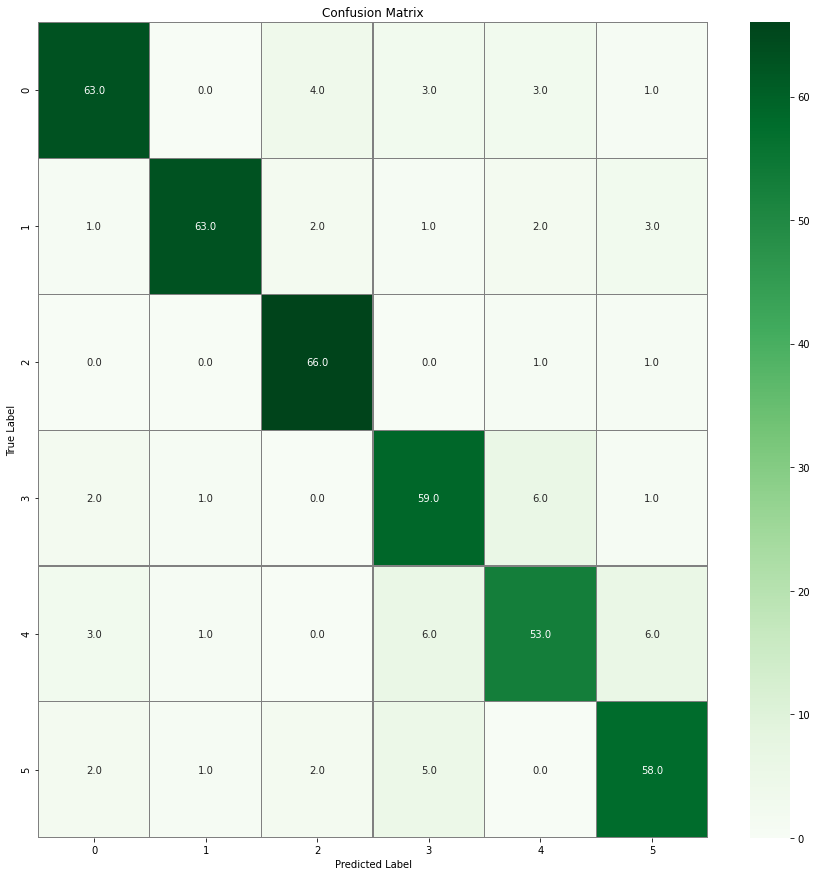

f1-score:
0.8613976286216896
precision_score:
0.8625024385587765
recall_score:
0.8621781948188597
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        74
           1       0.95      0.88      0.91        72
           2       0.89      0.97      0.93        68
           3       0.80      0.86      0.83        69
           4       0.82      0.77      0.79        69
           5       0.83      0.85      0.84        68

    accuracy                           0.86       420
   macro avg       0.86      0.86      0.86       420
weighted avg       0.86      0.86      0.86       420



In [ ]:
history = model.fit(data['X_train'], data['y_train'], validation_data=(data['X_test'], data['y_test']), epochs=20, verbose=2, batch_size=64)

def history2(history):
    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

history2(history)

import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
def confussion_mat(model):
    # Predict the values from the validation dataset
    Y_pred = model.predict(data['X_test'])
    # Convert predictions classes to one hot vectors 
    Y_pred_classes = np.argmax(Y_pred,axis = 1) 
    # Convert validation observations to one hot vectors
    Y_true = np.argmax(data['y_test'],axis = 1) 
    # compute the confusion matrix
    confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
    # plot the confusion matrix
    f,ax = plt.subplots(figsize=(15, 15))
    sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

confussion_mat(model)

from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
    
Y_pred = model.predict(data['X_test'])
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(data['y_test'],axis = 1) 
# compute the confusion matrix
print("f1-score:")
print(f1_score(Y_true, Y_pred_classes, average="macro"))
print("precision_score:")
print(precision_score(Y_true, Y_pred_classes, average="macro"))
print("recall_score:")
print(recall_score(Y_true, Y_pred_classes, average="macro")) 

# print("F1-score: {:.1%}".format(f1_score(Y_true, Y_pred_classes)))
print(classification_report(Y_true, Y_pred_classes))

model.save("trainedmodel_35Epoch.h5") # saving the model
#model = load_model('trainedmodel_11Epoch.h5')# loading model trained for 50 Epochs
#history = model.fit(data['X_train'], data['y_train'], validation_data=(data['X_test'], data['y_test']), epochs=4, verbose=2)

hist_df = pd.DataFrame(history.history) 
hist_json_file = 'history.json' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_json(f)

hist_csv_file = 'history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

maxlen = 4500

In [ ]:
history = model.fit(data['X_train'], data['y_train'], validation_data=(data['X_test'], data['y_test']), epochs=35, verbose=2, batch_size=64)

def history2(history):
    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

history2(history)

import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
def confussion_mat(model):
    # Predict the values from the validation dataset
    Y_pred = model.predict(data['X_test'])
    # Convert predictions classes to one hot vectors 
    Y_pred_classes = np.argmax(Y_pred,axis = 1) 
    # Convert validation observations to one hot vectors
    Y_true = np.argmax(data['y_test'],axis = 1) 
    # compute the confusion matrix
    confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
    # plot the confusion matrix
    f,ax = plt.subplots(figsize=(15, 15))
    sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

confussion_mat(model)

from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
    
Y_pred = model.predict(data['X_test'])
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(data['y_test'],axis = 1) 
# compute the confusion matrix
print("f1-score:")
print(f1_score(Y_true, Y_pred_classes, average="macro"))
print("precision_score:")
print(precision_score(Y_true, Y_pred_classes, average="macro"))
print("recall_score:")
print(recall_score(Y_true, Y_pred_classes, average="macro")) 

# print("F1-score: {:.1%}".format(f1_score(Y_true, Y_pred_classes)))
print(classification_report(Y_true, Y_pred_classes))

model.save("trainedmodel_35Epoch.h5") # saving the model
#model = load_model('trainedmodel_11Epoch.h5')# loading model trained for 50 Epochs
#history = model.fit(data['X_train'], data['y_train'], validation_data=(data['X_test'], data['y_test']), epochs=4, verbose=2)

hist_df = pd.DataFrame(history.history) 
hist_json_file = 'history.json' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_json(f)

hist_csv_file = 'history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)



Train on 1680 samples, validate on 420 samples
Epoch 1/35
 - 1110s - loss: 1.4977 - acc: 0.3589 - val_loss: 1.3644 - val_acc: 0.3667
Epoch 2/35
 - 1076s - loss: 1.2511 - acc: 0.4845 - val_loss: 1.0750 - val_acc: 0.5690
Epoch 3/35
 - 1074s - loss: 1.1159 - acc: 0.5667 - val_loss: 0.9278 - val_acc: 0.6381
Epoch 4/35
 - 1082s - loss: 0.9706 - acc: 0.6280 - val_loss: 0.8306 - val_acc: 0.6643
Epoch 5/35
 - 1089s - loss: 0.8963 - acc: 0.6560 - val_loss: 0.6988 - val_acc: 0.7524
Epoch 6/35
 - 1125s - loss: 0.7716 - acc: 0.7310 - val_loss: 0.6426 - val_acc: 0.7929
Epoch 7/35
 - 1090s - loss: 0.6973 - acc: 0.7625 - val_loss: 0.6267 - val_acc: 0.7929
Epoch 8/35
 - 1076s - loss: 0.6146 - acc: 0.7774 - val_loss: 0.5636 - val_acc: 0.8238
Epoch 9/35
 - 1078s - loss: 0.5805 - acc: 0.7994 - val_loss: 0.5217 - val_acc: 0.8262
Epoch 10/35
 - 1074s - loss: 0.4861 - acc: 0.8310 - val_loss: 0.4698 - val_acc: 0.8452
Epoch 11/35
 - 1072s - loss: 0.4077 - acc: 0.8774 - val_loss: 0.4293 - val_acc: 0.8571
Epo

maxlen = 4000

In [ ]:

history = model.fit(data['X_train'], data['y_train'], validation_data=(data['X_test'], data['y_test']), epochs=30, verbose=2, batch_size=64)

Train on 1680 samples, validate on 420 samples
Epoch 1/30
 - 947s - loss: 1.4508 - acc: 0.3595 - val_loss: 1.3551 - val_acc: 0.3905
Epoch 2/30
 - 940s - loss: 1.2389 - acc: 0.4792 - val_loss: 1.0231 - val_acc: 0.6024
Epoch 3/30
 - 938s - loss: 1.0277 - acc: 0.6054 - val_loss: 0.8775 - val_acc: 0.6786
Epoch 4/30
 - 938s - loss: 0.9804 - acc: 0.6381 - val_loss: 0.7701 - val_acc: 0.7548
Epoch 5/30
 - 940s - loss: 0.8293 - acc: 0.6905 - val_loss: 0.6746 - val_acc: 0.7833
Epoch 6/30
 - 937s - loss: 0.7454 - acc: 0.7327 - val_loss: 0.6741 - val_acc: 0.7667
Epoch 7/30
 - 943s - loss: 0.6460 - acc: 0.7702 - val_loss: 0.4926 - val_acc: 0.8357
Epoch 8/30
 - 936s - loss: 0.5329 - acc: 0.8202 - val_loss: 0.4924 - val_acc: 0.8405
Epoch 9/30
 - 938s - loss: 0.4883 - acc: 0.8387 - val_loss: 0.4515 - val_acc: 0.8357
Epoch 10/30
 - 945s - loss: 0.4527 - acc: 0.8494 - val_loss: 0.4873 - val_acc: 0.8381
Epoch 11/30
 - 943s - loss: 0.4658 - acc: 0.8470 - val_loss: 0.4115 - val_acc: 0.8667
Epoch 12/30
 - 9

In [ ]:
'''
history = model.fit(X_train, y_ohe,
                    epochs=20, verbose=1,
                    batch_size=512, shuffle=True)
'''

In [ ]:
# pred = model.predict(X_test, batch_size = 1024, verbose = 1)


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
def confussion_mat(model):
    # Predict the values from the validation dataset
    Y_pred = model.predict(data['X_test'])
    # Convert predictions classes to one hot vectors 
    Y_pred_classes = np.argmax(Y_pred,axis = 1) 
    # Convert validation observations to one hot vectors
    Y_true = np.argmax(data['y_test'],axis = 1) 
    # compute the confusion matrix
    confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
    # plot the confusion matrix
    f,ax = plt.subplots(figsize=(15, 15))
    sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

In [ ]:
def history2(history):
    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


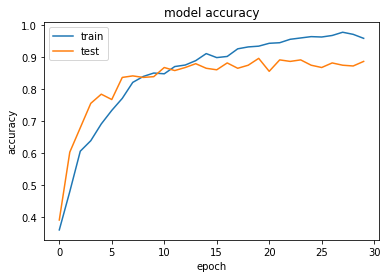

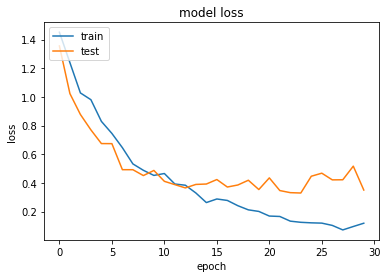

In [ ]:
history2(history)

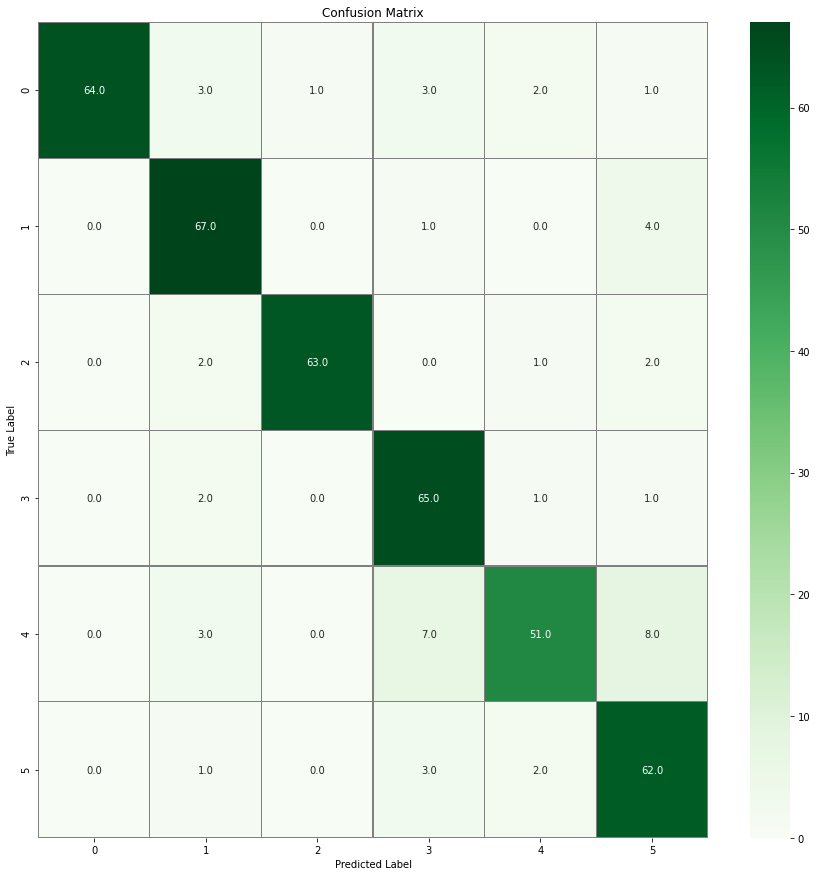

In [ ]:
confussion_mat(model)

In [ ]:
from sklearn.datasets import make_classification
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

# We use a utility to generate artificial classification data.
#X, y = make_classification(n_samples=100, n_informative=10, n_classes=3)
#sss = StratifiedShuffleSplit(y, n_iter=1, test_size=0.5, random_state=0)
#for train_idx, test_idx in sss:
    #X_train, X_test, y_train, y_test = X[train_idx], X[test_idx], y[train_idx], y[test_idx]
    #svc.fit(X_train, y_train)
    #y_pred = svc.predict(X_test)
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro")) 

max_len = 3000, bs=64


In [ ]:
max_features = 109803 + 1
def build_model(max_len, max_features, EMBEDDING_DIM, embedding_matrix):
    input_words = Input((max_len, ))
    x_words = Embedding(max_features,
                        EMBEDDING_DIM,
                        weights=[embedding_matrix],
                        mask_zero=True,
                        trainable=False)(input_words)
    x_words = SpatialDropout1D(0.2)(x_words)
    x_words = Bidirectional(LSTM(128, return_sequences=True))(x_words)
    x_words = Bidirectional(LSTM(128, return_sequences=True))(x_words)
    
    x = Attention(max_len)(x_words)
    #x = GlobalMaxPooling1D()(x)
    #x = GlobalAveragePooling1D()(x)
    x = Dropout(0.2)(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.2)(x)
    pred = Dense(6, activation='softmax')(x)

    model = Model(inputs=input_words, outputs=pred)
    return model

model = build_model(max_len, max_features, EMBEDDING_DIM, embedding_matrix)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
'''
MAX_SEQUENCE_LENGTH = 11276    #max([len(s.split()) for s in texts]) 
MAX_NUM_WORDS = 109803 + 1
vocab_size = MAX_NUM_WORDS
EMBEDDING_DIM = 300
VALIDATION_SPLIT = 0.2

data = load_data(MAX_NUM_WORDS , MAX_SEQUENCE_LENGTH,VALIDATION_SPLIT)
'''






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3000)              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 3000, 300)         32941200  
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 3000, 300)         0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 3000, 256)         439296    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 3000, 256)         394240    
___________________________________________________________

'\nMAX_SEQUENCE_LENGTH = 11276    #max([len(s.split()) for s in texts]) \nMAX_NUM_WORDS = 109803 + 1\nvocab_size = MAX_NUM_WORDS\nEMBEDDING_DIM = 300\nVALIDATION_SPLIT = 0.2\n\ndata = load_data(MAX_NUM_WORDS , MAX_SEQUENCE_LENGTH,VALIDATION_SPLIT)\n'

In [ ]:
import tensorflow as tf
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)


In [ ]:
# use only 10 epochs
history = model.fit(data['X_train'], data['y_train'], validation_data=(data['X_test'], data['y_test']), epochs=10, verbose=2, batch_size=64, callbacks=[callback])

Train on 1680 samples, validate on 420 samples
Epoch 1/10
 - 1424s - loss: 1.5380 - acc: 0.3470 - val_loss: 1.3341 - val_acc: 0.4405
Epoch 2/10
 - 1356s - loss: 1.2535 - acc: 0.4827 - val_loss: 1.0693 - val_acc: 0.5762
Epoch 3/10
 - 1336s - loss: 1.1115 - acc: 0.5631 - val_loss: 0.9925 - val_acc: 0.6214
Epoch 4/10
 - 1328s - loss: 0.9982 - acc: 0.6190 - val_loss: 0.7893 - val_acc: 0.7167
Epoch 5/10
 - 1323s - loss: 0.8513 - acc: 0.6851 - val_loss: 0.7232 - val_acc: 0.7476
Epoch 6/10
 - 1321s - loss: 0.7733 - acc: 0.7190 - val_loss: 0.6091 - val_acc: 0.7952
Epoch 7/10
 - 1359s - loss: 0.6179 - acc: 0.7875 - val_loss: 0.6004 - val_acc: 0.8000
Epoch 8/10
 - 1360s - loss: 0.5829 - acc: 0.8000 - val_loss: 0.4806 - val_acc: 0.8524
Epoch 9/10
 - 1358s - loss: 0.5330 - acc: 0.8202 - val_loss: 0.5882 - val_acc: 0.8048
Epoch 10/10
 - 1369s - loss: 0.5016 - acc: 0.8310 - val_loss: 0.4710 - val_acc: 0.8310


In [ ]:
def history2(history):
    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


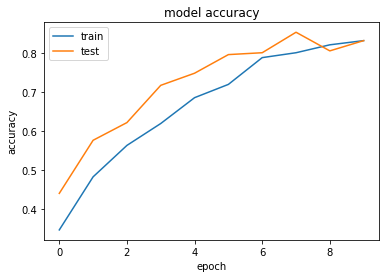

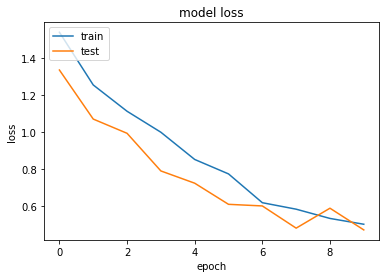

In [ ]:
history2(history)

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
def confussion_mat(model):
    # Predict the values from the validation dataset
    Y_pred = model.predict(data['X_test'])
    # Convert predictions classes to one hot vectors 
    Y_pred_classes = np.argmax(Y_pred,axis = 1) 
    # Convert validation observations to one hot vectors
    Y_true = np.argmax(data['y_test'],axis = 1) 
    # compute the confusion matrix
    confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
    # plot the confusion matrix
    f,ax = plt.subplots(figsize=(15, 15))
    sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

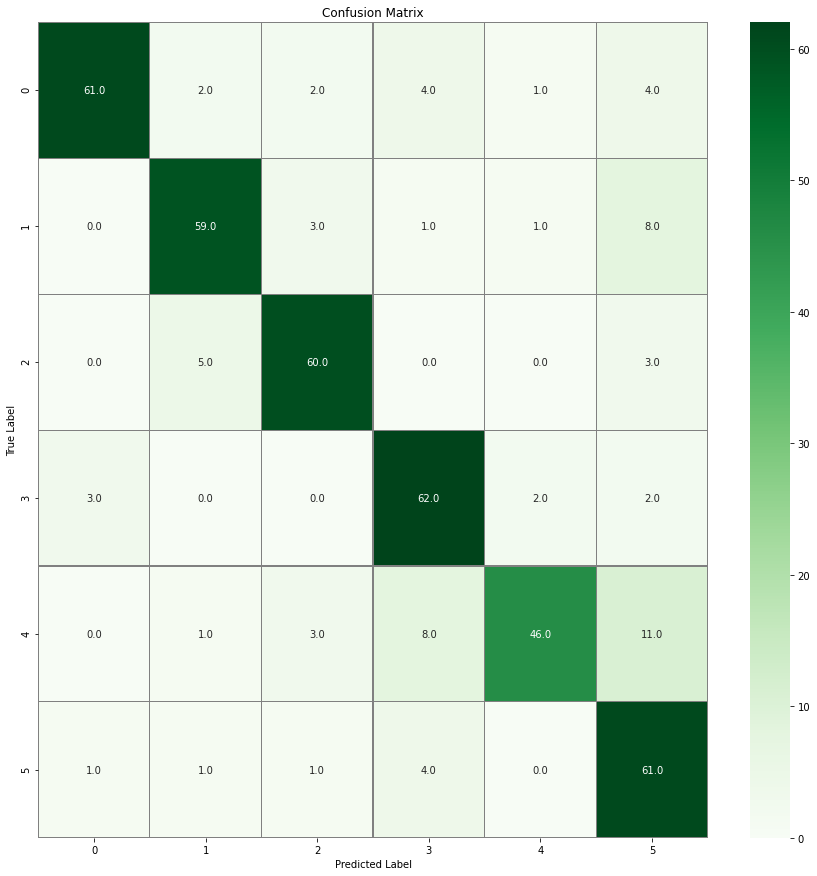

In [ ]:
confussion_mat(model)

In [ ]:
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
    
Y_pred = model.predict(data['X_test'])
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(data['y_test'],axis = 1) 
# compute the confusion matrix
print(f1_score(Y_true, Y_pred_classes, average="macro"))
print(precision_score(Y_true, Y_pred_classes, average="macro"))
print(recall_score(Y_true, Y_pred_classes, average="macro")) 

# print("F1-score: {:.1%}".format(f1_score(Y_true, Y_pred_classes)))
print(classification_report(Y_true, Y_pred_classes))
